In [1]:
import itertools
from scipy.stats import beta, binom

In [19]:
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

# Chapter 1: 

# Chapter 2: 

## Q1.
What is the probability of rolling two six-sided dice and getting a 
value greater than 7?

In [2]:
combinations = list(itertools.product(range(1,7),range(1,7)))
combinations

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [3]:
greater_7 = [sum(i) for i in combinations if sum(i) > 7]

In [4]:
print(f"Number of pairs with values greater than 7:  {len(greater_7)}")
print(f"Total number of pairs: {len(combinations)}")
print(f"P(>7)={round(len(greater_7)/len(combinations),2)}")

Number of pairs with values greater than 7:  15
Total number of pairs: 36
P(>7)=0.42


## Q2.
What is the probability of rolling three six-sided dice and getting a 
value greater than 7?

In [6]:
combinations_3dice = list(itertools.product(range(1,7),range(1,7),range(1,7)))
greater_7_3dice = [sum(i) for i in combinations_3dice if sum(i) > 7]

In [7]:
print(f"Number of pairs with values greater than 7:  {len(greater_7_3dice)}")
print(f"Total number of pairs: {len(combinations_3dice)}")
print(f"P(>7)={round(len(greater_7_3dice)/len(combinations_3dice),2)}")

Number of pairs with values greater than 7:  181
Total number of pairs: 216
P(>7)=0.84


## Q3.
The Yankees are playing the Red Sox. You’re a diehard Sox fan and 
bet your friend they’ll win the game. You’ll pay your friend 30 dollars if the Sox 
lose and your friend will have to pay you only 5 dollars if the Sox win. What is 
the probability you have intuitively assigned to the belief that the Red Sox 
will win?

In [8]:
odds_RSwin = 30/5
prob_RSwin = odds_RSwin/(1+odds_RSwin)
round(prob_RSwin,2)

0.86

# Chapter 3: The Logic of Uncertainty
## Q1. 
What is the probability of rolling a 20 three times in a row on a 
20-sided die?

In [9]:
(1/20)**3 # or (1/20)*(1/20)*(1/20)

0.00012500000000000003

## Q2. 
The weather report says there’s a 10 percent chance of rain tomorrow, 
and you forget your umbrella half the time you go out. What is the probability that you’ll be caught in the rain without an umbrella tomorrow?

In [10]:
p_rain = 0.1
p_umbrella = 0.5
p_rain*p_umbrella

0.05

## Q3. 
Raw eggs have a 1/20,000 probability of having salmonella. If you eat 
two raw eggs, what is the probability you ate a raw egg with salmonella?

In [11]:
1/20000 + 1/20000 #given that they are independent

0.0001

In [12]:
round(1/20000 + 1/20000 - 1/20000 * (1/20000),5) #more formally correct

0.0001

## Q4. 
What is the probability of either flipping two heads in two coin tosses 
or rolling three 6s in three six-sided dice rolls?

In [13]:
p_two_heads = 0.5 * 0.5
p_three_six = (1/6)*(1/6)*(1/6)
p_either_event = p_two_heads + p_three_six
round(p_either_event,2)

0.25

# Chapter 4: Creating a Binomial Probability Distribution
## Q1. 
What are the parameters of the binomial distribution for the probability of rolling either a 1 or a 20 on a 20-sided die, if we roll the die 
12 times?

In [14]:
p = 1/20 + 1/20 #prob of either 1 or 20
k = 1 #looking for event to occur once
n = 12 # 12 trials

## Q2. 
There are four aces in a deck of 52 cards. If you pull a card, return 
the card, then reshuffle and pull a card again, how many ways can you pull 
just one ace in five pulls?

In [20]:
choose(5,1)

5

## Q3. 
For the example in question 2, what is the probability of pulling five 
aces in 10 pulls (remember the card is shuffled back in the deck when it is 
pulled)?

In [33]:
k = 5
n = 10
p = 4/52
binom.pmf(k,n,p)

0.0004548552879040868

# Chapter 5: The Beta Distribution
## Q1. 
You want to use the beta distribution to determine whether or not a
coin you have is a fair coin—meaning that the coin gives you heads and
tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using
the beta distribution, what is the probability that the coin will land on
heads more than 60 percent of the time?

In [ ]:
betacdf = beta(4,6).cdf

betacdf(1.0) - betacdf(0.6)

## Q2. 
You flip the coin 10 more times and now have 9 heads and 11 tails
total. What is the probability that the coin is fair, using our definition of
fair, give or take 5 percent?

In [ ]:
betacdf = beta(9,11).cdf

betacdf(0.55) - betacdf(0.45)

## Q3. 
Data is the best way to become more confident in your assertions. You
flip the coin 200 more times and end up with 109 heads and 111 tails. Now
what is the probability that the coin is fair, give or take 5 percent?

In [ ]:
betacdf = beta(109,111).cdf

betacdf(0.55) - betacdf(0.45)

# Chapter 6: Conditional Probability
## Q1. 
What piece of information would we need in order to use Bayes’
theorem to determine the probability that someone in 2010 who had GBS
also had the flu vaccine that year?

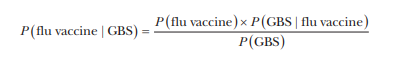

## Q2. 
What is the probability that a random person picked from the
population is female and is not color blind?

In [ ]:
p_female = 0.5
p_colorblind_given_f = 0.005
p_notcolorblind_female = p_female*(1-p_colorblind_given_f)
p_notcolorblind_female

## Q3. 
What is the probability that a male who received the flu vaccine in
2010 is either color blind or has GBS?

In [ ]:
p_GBS_given_fvac = 3/100000
p_colorblind_given_m = 0.08
p_male = 0.5
p_male_and_colorblind = p_colorblind_given_m * p_male #gives 0.04 not 0.004 as described in book solutions.

p_male_and_colorblind + p_GBS_given_fvac - p_male_and_colorblind * p_GBS_given_fvac